<h1 style="color:white;">STEP1;Import Label Data(CSV)</h1>

In [1]:
import pandas as pd

label_path = r"C:\Users\vijay\OneDrive\Desktop\meme dataset\labels.csv"
df_labels = pd.read_csv(label_path)
df_labels.columns = [col.strip() for col in df_labels.columns]  # Clean column names
print(df_labels.head())


   Unnamed: 0    image_name  \
0           0   image_1.jpg   
1           1  image_2.jpeg   
2           2   image_3.JPG   
3           3   image_4.png   
4           4   image_5.png   

                                            text_ocr  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1  The best of #10 YearChallenge! Completed in le...   
2  Sam Thorne @Strippin ( Follow Follow Saw every...   
3              10 Year Challenge - Sweet Dee Edition   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   

                                      text_corrected overall_sentiment  
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...     very_positive  
1  The best of #10 YearChallenge! Completed in le...     very_positive  
2  Sam Thorne @Strippin ( Follow Follow Saw every...          positive  
3              10 Year Challenge - Sweet Dee Edition          positive  
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...           neutral  


<h2 style="color:white;">2: Import Image Data (from folder)</h2>

In [2]:
import os

image_folder = r"C:\Users\vijay\OneDrive\Desktop\Machine_learning\images"
image_files = os.listdir(image_folder)
df_images = pd.DataFrame({'image_name': image_files})
print(df_images.head())


       image_name
0     image_1.jpg
1    image_10.png
2   image_100.jpg
3  image_1000.png
4  image_1001.png


<h2 style="color:white;">3:Merge Labels and Images</h2>

In [3]:
df = pd.merge(df_labels, df_images, on='image_name', how='inner')
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(image_folder, x))
print(df.head())


   Unnamed: 0    image_name  \
0           0   image_1.jpg   
1           1  image_2.jpeg   
2           2   image_3.JPG   
3           3   image_4.png   
4           4   image_5.png   

                                            text_ocr  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1  The best of #10 YearChallenge! Completed in le...   
2  Sam Thorne @Strippin ( Follow Follow Saw every...   
3              10 Year Challenge - Sweet Dee Edition   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   

                                      text_corrected overall_sentiment  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...     very_positive   
1  The best of #10 YearChallenge! Completed in le...     very_positive   
2  Sam Thorne @Strippin ( Follow Follow Saw every...          positive   
3              10 Year Challenge - Sweet Dee Edition          positive   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...           neutral   

                               

<h2 style="color:white;">Tip: If you're using OCR or image embeddings later</h2>

In [4]:
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(image_folder, x))

<h1 style="color:white;">Step 2: Clean and Preprocess Text</h1>

In [5]:
text_column = 'text_corrected'

<h2 style="color:white;">2. Define a cleaning function</h2>

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text.lower()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2 style="color:white;">3.Apply cleaning to your DataFrame</h2>

In [7]:
df['clean_text'] = df[text_column].apply(clean_text)
print(df[['clean_text']].head())

                                          clean_text
0  look there my friend lightyear now all sohalik...
1  the best of 10 yearchallenge completed in less...
2  sam thorne strippin  follow follow saw everyon...
3               10 year challenge  sweet dee edition
4  10 year challenge with no filter 47 hilarious ...


<h2 style="color:white;">4. Optional: Remove stopwords</h2>

In [8]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define stopword removal function
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['clean_text'] = df['text_corrected'].apply(clean_text).apply(remove_stopwords)
print(df[['clean_text']].head())

                                          clean_text
0  look friend lightyear sohalikut trend play 10 ...
1  best 10 yearchallenge completed less 4 years k...
2  sam thorne strippin follow follow saw everyone...
3                10 year challenge sweet dee edition
4  10 year challenge filter 47 hilarious 10 year ...


In [10]:
print(df.columns.tolist())


['Unnamed: 0', 'image_name', 'text_ocr', 'text_corrected', 'overall_sentiment', 'image_path', 'clean_text']


In [11]:
print(df.columns.tolist())

['Unnamed: 0', 'image_name', 'text_ocr', 'text_corrected', 'overall_sentiment', 'image_path', 'clean_text']


In [12]:
print(df['overall_sentiment'].value_counts())

overall_sentiment
positive         3127
neutral          2201
very_positive    1033
negative          480
very_negative     151
Name: count, dtype: int64


In [13]:
df_balanced = df.groupby('overall_sentiment').apply(
    lambda x: x.sample(n=min(len(x), 500), random_state=42)
).reset_index(drop=True)

C:\Users\vijay\AppData\Local\Temp\ipykernel_20712\188680072.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('overall_sentiment').apply(


<h3 style="color:white;">Split the Data</h3>

In [14]:
from sklearn.model_selection import train_test_split

# Vectorize the balanced dataset
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_balanced['clean_text'])
y = df_balanced['overall_sentiment']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3 style="color:white;">Train and Predict</h3>

In [15]:
from sklearn.linear_model import LogisticRegression

# Train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

<h3 style="color:white;">Graphical Comparison</h3>

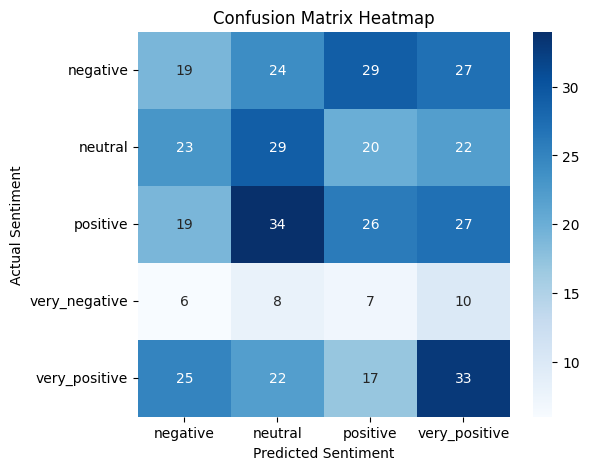

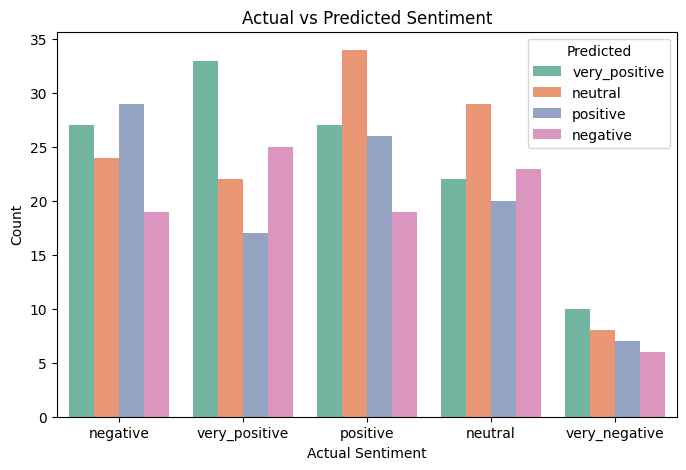

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Confusion matrix heatmap
label_counts = comparison_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)
plt.figure(figsize=(6, 5))
sns.heatmap(label_counts, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual Sentiment")
plt.xlabel("Predicted Sentiment")
plt.show()

# Bar chart of Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.countplot(data=comparison_df, x='Actual', hue='Predicted', palette='Set2')
plt.title("Actual vs Predicted Sentiment")
plt.ylabel("Count")
plt.xlabel("Actual Sentiment")
plt.legend(title="Predicted")
plt.show()

<h1 style="color:white;">Step 3: Convert Text to Features (TF-IDF)</h1>

<h2 style="color:white;">1.Bag of Words</h2>

In [17]:
print(df.columns)

Index(['Unnamed: 0', 'image_name', 'text_ocr', 'text_corrected',
       'overall_sentiment', 'image_path', 'clean_text'],
      dtype='object')


<h2 style="color:white;">TF-IDF Vectorization</h2>

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample texts
texts = ["I love memes", "Memes are fun", "I enjoy funny content"]

# Initialize and fit TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(texts)

# Output feature names and matrix
print("Feature names:", vectorizer.get_feature_names_out())
print("Feature matrix:\n", X_tfidf.toarray())

Feature names: ['are' 'content' 'enjoy' 'fun' 'funny' 'love' 'memes']
Feature matrix:
 [[0.         0.         0.         0.         0.         0.79596054
  0.60534851]
 [0.62276601 0.         0.         0.62276601 0.         0.
  0.4736296 ]
 [0.         0.57735027 0.57735027 0.         0.57735027 0.
  0.        ]]


<h2 style="color:white;">2.Word Embeddings (Using spaCy) </h2>

In [19]:
import spacy

# Load the spaCy model (make sure it's installed)
nlp = spacy.load("en_core_web_md")

# Sample text
text = "Memes are fun and expressive"
doc = nlp(text)

# Convert to feature vector by averaging token vectors
feature_vector = doc.vector

# Output the shape of the embedding
print("Embedding vector shape:", feature_vector.shape)

Embedding vector shape: (300,)


<h2 style="color:white;">4.Custom Feature Extraction (e.g., Text Length, Sentiment)</h2>

In [20]:
import pandas as pd
from textblob import TextBlob

# Sample texts
texts = ["I love memes", "Memes are fun", "I enjoy funny content"]

# Create DataFrame
df = pd.DataFrame(texts, columns=["text"])

# Add text length feature
df["length"] = df["text"].apply(len)

# Preview DataFrame
print(df)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Preview column names
print(df.columns.tolist())

                    text  length
0           I love memes      12
1          Memes are fun      13
2  I enjoy funny content      21
['text', 'length']


In [21]:
print(df.columns)

Index(['text', 'length'], dtype='object')


In [22]:
df.columns = df.columns.str.strip().str.lower()

In [23]:
from textblob import TextBlob
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

<h2 style="color:white;">Custom Features (Length, Sentiment)</h2>

In [24]:
def get_sentiment(p):
    if p > 0.01:
        return 'positive'
    elif p < -0.01:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'polarity' column
df['sentiment'] = df['polarity'].apply(get_sentiment)

# Display sentiment distribution
print(df['sentiment'].value_counts())

sentiment
positive    3
Name: count, dtype: int64


In [25]:
print(df.columns.tolist())

['text', 'length', 'polarity', 'sentiment']


In [26]:
df['clean_text'] = df['text'].astype(str).str.lower().str.replace(r'[^a-z\s]', '', regex=True)

<h2 style="color:white;">Step 4:Sentiment Analysis with VADER</h2>

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(vader_sentiment)
print(df['sentiment'].value_counts())


sentiment
positive    3
Name: count, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<h2 style="color:white;">Step 5: Balance Dataset for Binary Classification</h2>

In [28]:
# Step 1: Check how many sentiment classes exist
unique_classes = df['sentiment'].unique()
print("Unique sentiment classes:", unique_classes)

# Step 2: Filter for binary classification (positive vs negative)
df_filtered = df[df['sentiment'].isin(['positive', 'negative'])]

# Step 3: Check class counts
class_counts = df_filtered['sentiment'].value_counts()
print("Class counts:\n", class_counts)

# Step 4: Balance the dataset if both classes are present
if len(class_counts) >= 2:
    min_count = class_counts.min()
    df_balanced = (
        df_filtered
        .groupby('sentiment')
        .apply(lambda x: x.sample(min_count, random_state=42))
        .reset_index(drop=True)
    )
    print("✅ Balanced class counts:\n", df_balanced['sentiment'].value_counts())
else:
    print("Not enough class diversity to train a model.")

Unique sentiment classes: ['positive']
Class counts:
 sentiment
positive    3
Name: count, dtype: int64
Not enough class diversity to train a model.


In [29]:
print(df['sentiment'].value_counts(dropna=False))

sentiment
positive    3
Name: count, dtype: int64


In [30]:
print(df['clean_text'].head())

0             i love memes
1            memes are fun
2    i enjoy funny content
Name: clean_text, dtype: object


In [31]:
new_texts = [
    "I love memes",               # positive
    "Memes are fun",              # positive
    "I enjoy funny content",      # positive
    "This meme is boring",        # negative
    "I hate this meme",           # negative
    "Meh, it's okay I guess",     # neutral
    "Not really funny",           # negative
    "Absolutely hilarious!",      # positive
    "I don't get it",             # neutral
]

df = pd.DataFrame({'clean_text': new_texts})
df['sentiment'] = df['clean_text'].apply(vader_sentiment)
print(df['sentiment'].value_counts())

sentiment
positive    5
negative    3
neutral     1
Name: count, dtype: int64


In [32]:
# Filter for binary classification
df_filtered = df[df['sentiment'].isin(['positive', 'negative'])]

# Check class counts
class_counts = df_filtered['sentiment'].value_counts()

# Balance the dataset
if len(class_counts) >= 2:
    min_count = class_counts.min()
    df_balanced = (
        df_filtered
        .groupby('sentiment')
        .apply(lambda x: x.sample(min_count, random_state=42))
        .reset_index(drop=True)
    )
    print("✅ Balanced class counts:\n", df_balanced['sentiment'].value_counts())
else:
    print(" Not enough class diversity to train a model.")

✅ Balanced class counts:
 sentiment
negative    3
positive    3
Name: count, dtype: int64


C:\Users\vijay\AppData\Local\Temp\ipykernel_20712\893140594.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


In [33]:
# Vectorize and train
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_balanced['clean_text'])
y = df_balanced['sentiment']

<h2 style="color:white;">Step 6: Train Sentiment Classifier</h2>

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       2.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\vijay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\vijay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\vijay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

<h2 style="color:white;">Step 7: Model Evaluation & Visualization</h2>

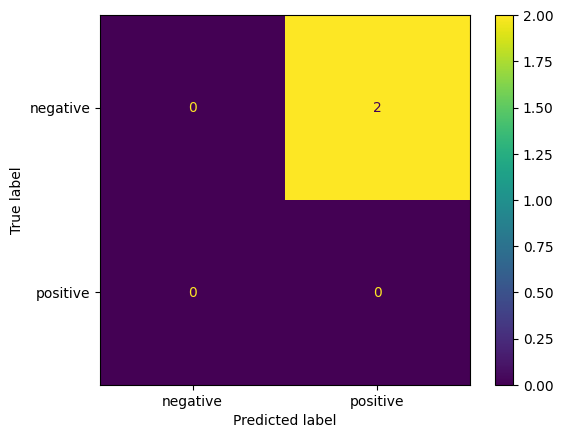

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

<h2 style="color:white;">Visualize TF-IDF feature importance</h2>

In [36]:
import numpy as np
feature_names = vectorizer.get_feature_names_out()
coefs = clf.coef_[0]
top_features = np.argsort(coefs)[-10:]
print("Top positive indicators:", feature_names[top_features])

Top positive indicators: ['is' 'hate' 'this' 'are' 'memes' 'fun' 'content' 'enjoy' 'absolutely'
 'hilarious']


 <h3 style="color:white;">Deploy the Model</h3>


In [37]:
import joblib
joblib.dump(clf, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [38]:
import joblib

# Load the trained model and vectorizer
clf = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# New input text
test_text = "This meme is hilarious!"

# Transform using the same vectorizer
test_vector = vectorizer.transform([test_text])

# Predict sentiment
predicted_label = clf.predict(test_vector)[0]
print("Predicted sentiment:", predicted_label)

Predicted sentiment: positive


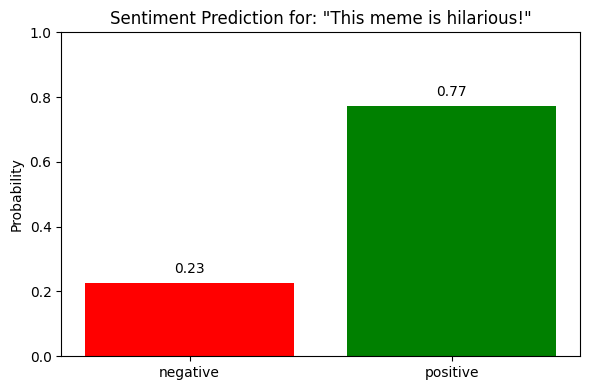

In [39]:
import matplotlib.pyplot as plt

# Get prediction probabilities
probabilities = clf.predict_proba(test_vector)[0]
class_labels = clf.classes_

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(class_labels, probabilities, color=['red' if label == 'negative' else 'green' for label in class_labels])
plt.title(f"Sentiment Prediction for: \"{test_text}\"")
plt.ylabel("Probability")
plt.ylim(0, 1)

# Annotate bars
for bar, prob in zip(bars, probabilities):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f"{prob:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<h3 style="color:white;">To Test with New Input</h3>

In [40]:
test_text = "This meme is hilarious!"
test_vector = vectorizer.transform([test_text])
print("Predicted sentiment:", clf.predict(test_vector)[0])

Predicted sentiment: positive
